# Machine Learning Task Progress Report
### Can Küçükyılmaz

This notebook includes various methods and algorithms I have used for a machine learning task of a job recruitment process.

# Neural Network Models

My first aproach to the problem was using neural network. Depending on the result of a plain model, I would have options to add, delete or change different layers depending on the model's performance.

In [ ]:
# Loading the data
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/task_2022/train_data_swc.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,y
0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.2,0.8,0.0,0.0,0.0,0.0,0.6,0.2,0.0,0.0,...,0.2,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,9
2,0.0,0.0,0.0,0.4,0.0,0.0,3.2,0.0,0.0,0.0,...,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.4,0.0,0.0,0.0,0.4,0.0,0.0,0.6,...,0.0,0.0,0.0,0.6,0.2,0.0,0.0,0.2,0.0,9


In [ ]:
print(sorted(df['y'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Data at hand has 108 features and 9 classes to predict from.

In [ ]:
# OneHotEncoding
one_hot = pd.get_dummies(df['y'])
df = df.drop('y', axis=1)
df = df.join(one_hot)
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_108,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,0,0,0
1,0.2,0.8,0.0,0.0,0.0,0.0,0.6,0.2,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.4,0.0,0.0,3.2,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,0,0,0
3,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,0.4,0.0,0.0,0.0,0.4,0.0,0.0,0.6,...,0.0,0,0,0,0,0,0,0,0,1


In [ ]:
X = df.iloc[:, :108]
y = df.iloc[:, 108:]

In [ ]:
# Data standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Splitting data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.8, random_state = 42)

In [ ]:
# Importing TensorFlow to create a neural network model
import tensorflow as tf
tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [ ]:
# Plain Neural Network
NN = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[108]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [ ]:
NN.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = NN.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
)

Epoch 1/100
782/782 [==============================] - 10s 8ms/step - loss: 0.8258 - accuracy: 0.7067 - val_loss: 0.6551 - val_accuracy: 0.7461
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 0.6074 - accuracy: 0.7651 - val_loss: 0.6085 - val_accuracy: 0.7662
Epoch 3/100
782/782 [==============================] - 3s 3ms/step - loss: 0.5714 - accuracy: 0.7782 - val_loss: 0.5875 - val_accuracy: 0.7755
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.5484 - accuracy: 0.7851 - val_loss: 0.5779 - val_accuracy: 0.7736
Epoch 5/100
782/782 [==============================] - 3s 3ms/step - loss: 0.5315 - accuracy: 0.7920 - val_loss: 0.5647 - val_accuracy: 0.7833
Epoch 6/100
782/782 [==============================] - 2s 3ms/step - loss: 0.5204 - accuracy: 0.7960 - val_loss: 0.5713 - val_accuracy: 0.7757
Epoch 7/100
782/782 [==============================] - 2s 3ms/step - loss: 0.5086 - accuracy: 0.7988 - val_loss: 0.5846 - val_accuracy: 0.775

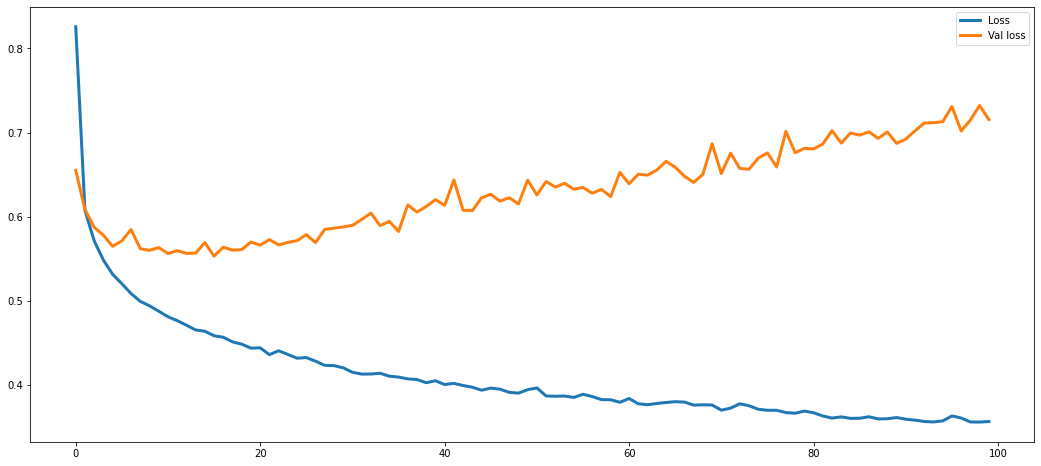

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(history.history['loss'], label='Loss', lw=3)
plt.plot(history.history['val_loss'], label='Val loss', lw=3)
plt.legend();

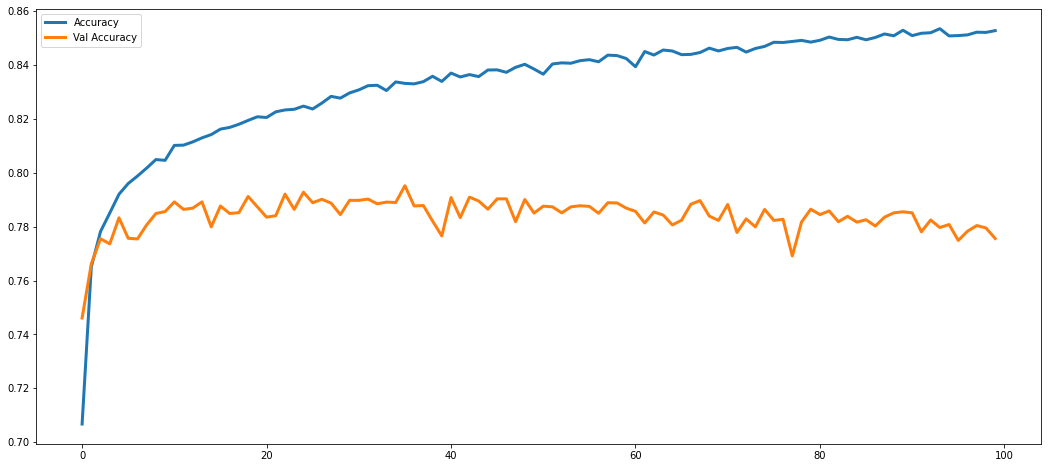

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(history.history['accuracy'], label='Accuracy', lw=3)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', lw=3)
plt.legend();

As expected, without any regularization methods, the model overfits. Let's try different regularization methods.

In [ ]:
# Adding batchnormalization layers
NN2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[108]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [ ]:
NN2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = NN2.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
)

Epoch 1/100
782/782 [==============================] - 7s 5ms/step - loss: 0.7771 - accuracy: 0.7203 - val_loss: 0.6281 - val_accuracy: 0.7598
Epoch 2/100
782/782 [==============================] - 3s 4ms/step - loss: 0.6164 - accuracy: 0.7646 - val_loss: 0.5950 - val_accuracy: 0.7713
Epoch 3/100
782/782 [==============================] - 4s 6ms/step - loss: 0.5849 - accuracy: 0.7732 - val_loss: 0.5874 - val_accuracy: 0.7765
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.5661 - accuracy: 0.7806 - val_loss: 0.5745 - val_accuracy: 0.7808
Epoch 5/100
782/782 [==============================] - 3s 4ms/step - loss: 0.5557 - accuracy: 0.7837 - val_loss: 0.5654 - val_accuracy: 0.7782
Epoch 6/100
782/782 [==============================] - 3s 4ms/step - loss: 0.5420 - accuracy: 0.7886 - val_loss: 0.5571 - val_accuracy: 0.7829
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 0.5328 - accuracy: 0.7915 - val_loss: 0.5659 - val_accuracy: 0.7798

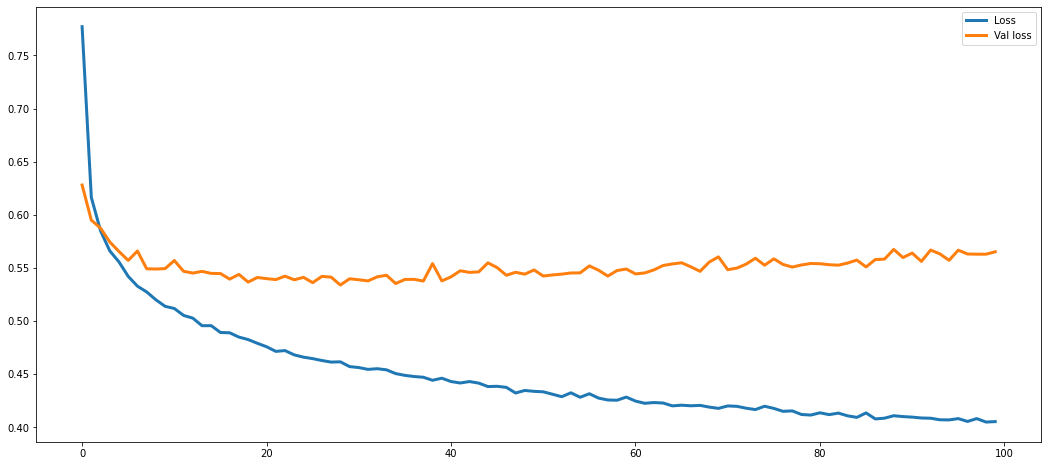

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(history.history['loss'], label='Loss', lw=3)
plt.plot(history.history['val_loss'], label='Val loss', lw=3)
plt.legend();

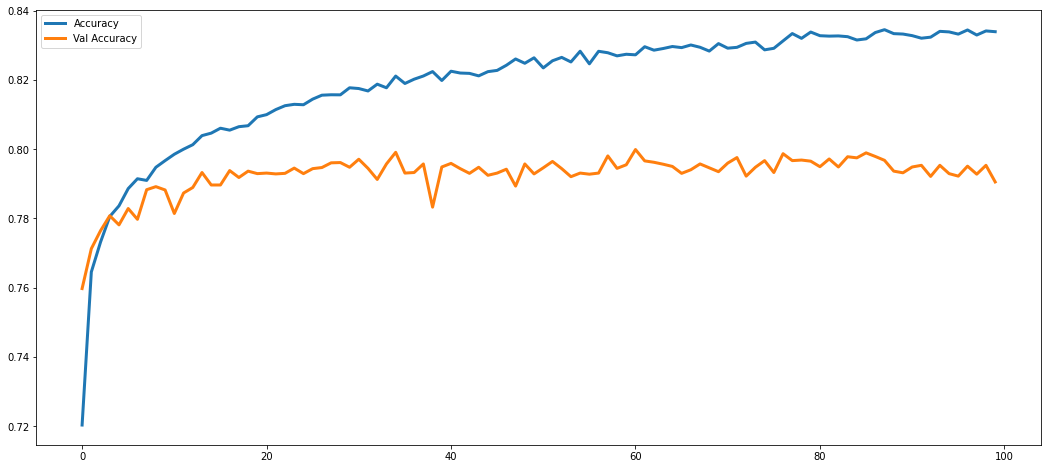

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(history.history['accuracy'], label='Accuracy', lw=3)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', lw=3)
plt.legend();

Slight improvement is observed after adding the BatchNormalization layers. Let's now add dropout layers in order to further decrease the model's overfitting problems.

In [ ]:
# Adding batchnormalization layers
NN3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[108]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [ ]:
NN3.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = NN3.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
)

Epoch 1/100
782/782 [==============================] - 6s 5ms/step - loss: 0.9415 - accuracy: 0.6741 - val_loss: 0.6873 - val_accuracy: 0.7394
Epoch 2/100
782/782 [==============================] - 5s 6ms/step - loss: 0.7437 - accuracy: 0.7310 - val_loss: 0.6467 - val_accuracy: 0.7549
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 0.7073 - accuracy: 0.7395 - val_loss: 0.6288 - val_accuracy: 0.7594
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.6870 - accuracy: 0.7451 - val_loss: 0.6077 - val_accuracy: 0.7672
Epoch 5/100
782/782 [==============================] - 5s 6ms/step - loss: 0.6757 - accuracy: 0.7477 - val_loss: 0.6066 - val_accuracy: 0.7602
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 0.6619 - accuracy: 0.7522 - val_loss: 0.6015 - val_accuracy: 0.7654
Epoch 7/100
782/782 [==============================] - 3s 4ms/step - loss: 0.6556 - accuracy: 0.7554 - val_loss: 0.5857 - val_accuracy: 0.7718

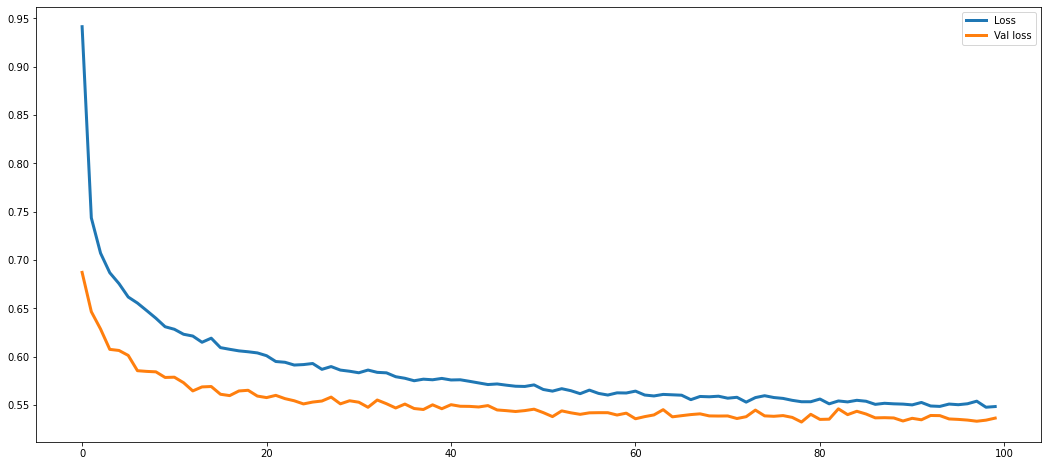

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(history.history['loss'], label='Loss', lw=3)
plt.plot(history.history['val_loss'], label='Val loss', lw=3)
plt.legend();

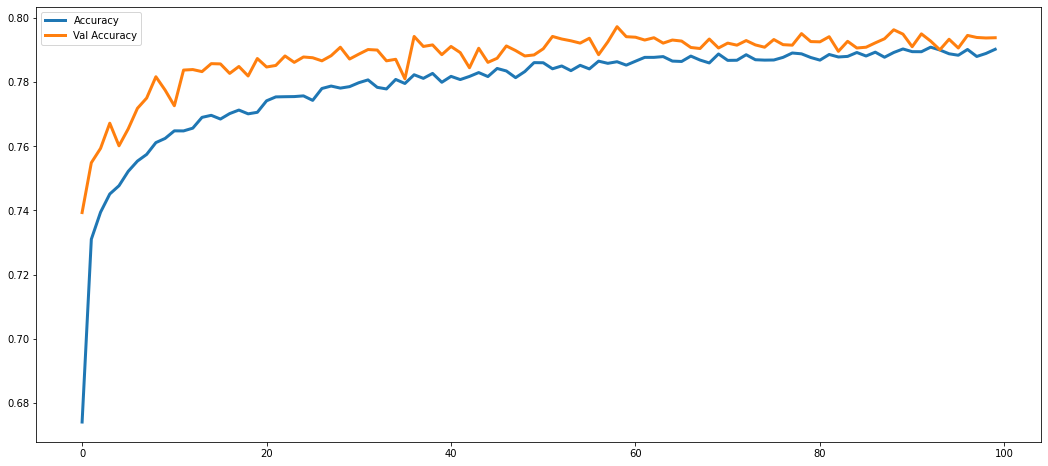

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(history.history['accuracy'], label='Accuracy', lw=3)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', lw=3)
plt.legend();

Neural network with dropout and batch normalization layers are definitely an improvement. Adding one more layer to the network and increasing the epoch size on the next model.

In [ ]:
NN4 = tf.keras.Sequential([
    tf.keras.layers.Dense(96, activation='relu', input_shape=[108]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [ ]:
NN4.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = NN4.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=64,
    validation_data=(X_test, y_test),
)

Epoch 1/150
782/782 [==============================] - 8s 5ms/step - loss: 0.9410 - accuracy: 0.6752 - val_loss: 0.6942 - val_accuracy: 0.7400
Epoch 2/150
782/782 [==============================] - 4s 6ms/step - loss: 0.7563 - accuracy: 0.7272 - val_loss: 0.6510 - val_accuracy: 0.7496
Epoch 3/150
782/782 [==============================] - 5s 7ms/step - loss: 0.7168 - accuracy: 0.7381 - val_loss: 0.6318 - val_accuracy: 0.7618
Epoch 4/150
782/782 [==============================] - 4s 5ms/step - loss: 0.6927 - accuracy: 0.7459 - val_loss: 0.6072 - val_accuracy: 0.7650
Epoch 5/150
782/782 [==============================] - 4s 5ms/step - loss: 0.6824 - accuracy: 0.7478 - val_loss: 0.6067 - val_accuracy: 0.7610
Epoch 6/150
782/782 [==============================] - 6s 7ms/step - loss: 0.6678 - accuracy: 0.7524 - val_loss: 0.6005 - val_accuracy: 0.7621
Epoch 7/150
782/782 [==============================] - 4s 5ms/step - loss: 0.6599 - accuracy: 0.7547 - val_loss: 0.5835 - val_accuracy: 0.7716

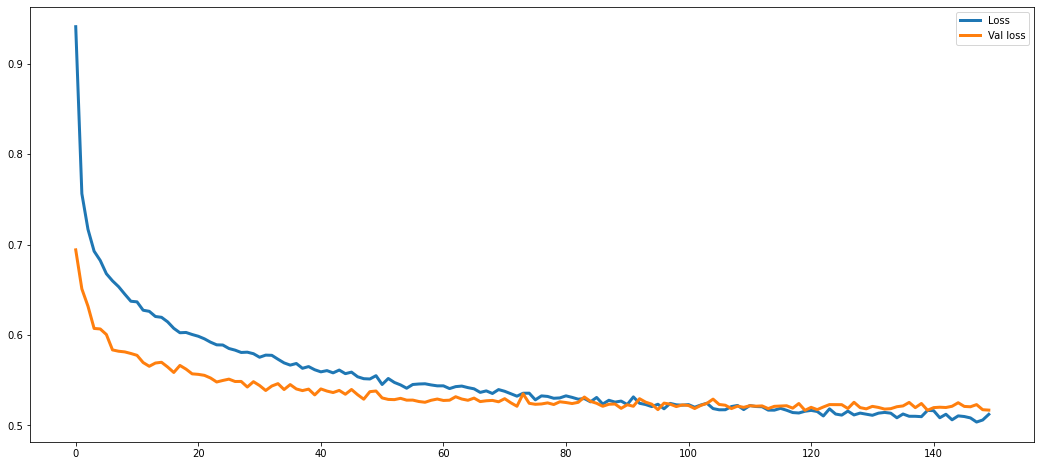

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(history.history['loss'], label='Loss', lw=3)
plt.plot(history.history['val_loss'], label='Val loss', lw=3)
plt.legend();

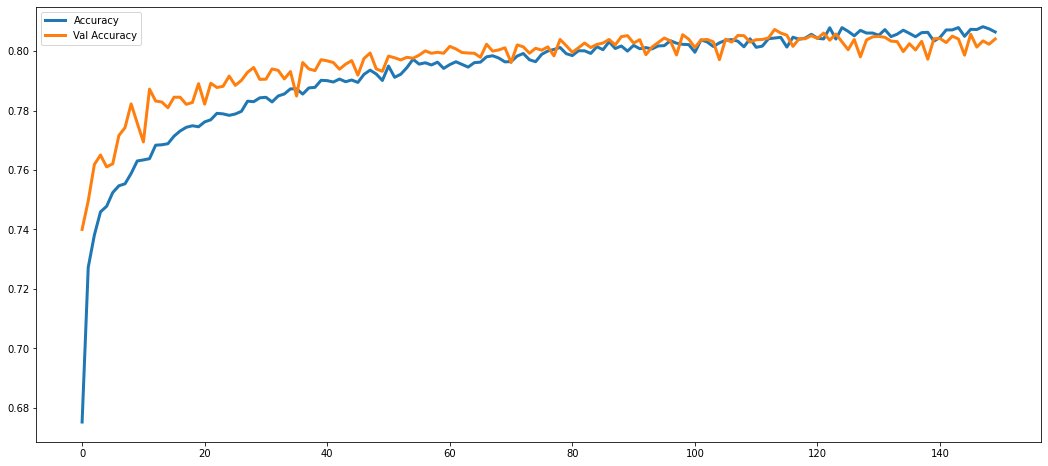

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(history.history['accuracy'], label='Accuracy', lw=3)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', lw=3)
plt.legend();

Around epoch 120, the validation accuracy stops increasing and starts decreasing for consecutive epochs for the first time. Let's now try adding a learning rate scheduler callback that will decrease the learning rate after epoch 120.

In [ ]:
def scheduler(epoch, lr):
  if epoch < 120:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
lrscheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
# No changes are made to the model
NN5 = tf.keras.Sequential([
    tf.keras.layers.Dense(96, activation='relu', input_shape=[108]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [ ]:
NN5.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = NN5.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[lrscheduler]
)

Epoch 1/150
782/782 [==============================] - 7s 6ms/step - loss: 0.9526 - accuracy: 0.6702 - val_loss: 0.6995 - val_accuracy: 0.7353 - lr: 0.0100
Epoch 2/150
782/782 [==============================] - 5s 6ms/step - loss: 0.7605 - accuracy: 0.7269 - val_loss: 0.6579 - val_accuracy: 0.7487 - lr: 0.0100
Epoch 3/150
782/782 [==============================] - 5s 6ms/step - loss: 0.7224 - accuracy: 0.7354 - val_loss: 0.6355 - val_accuracy: 0.7574 - lr: 0.0100
Epoch 4/150
782/782 [==============================] - 5s 6ms/step - loss: 0.6945 - accuracy: 0.7429 - val_loss: 0.6046 - val_accuracy: 0.7720 - lr: 0.0100
Epoch 5/150
782/782 [==============================] - 5s 6ms/step - loss: 0.6838 - accuracy: 0.7480 - val_loss: 0.6006 - val_accuracy: 0.7658 - lr: 0.0100
Epoch 6/150
782/782 [==============================] - 5s 6ms/step - loss: 0.6686 - accuracy: 0.7530 - val_loss: 0.5999 - val_accuracy: 0.7715 - lr: 0.0100
Epoch 7/150
782/782 [==============================] - 4s 5ms/st

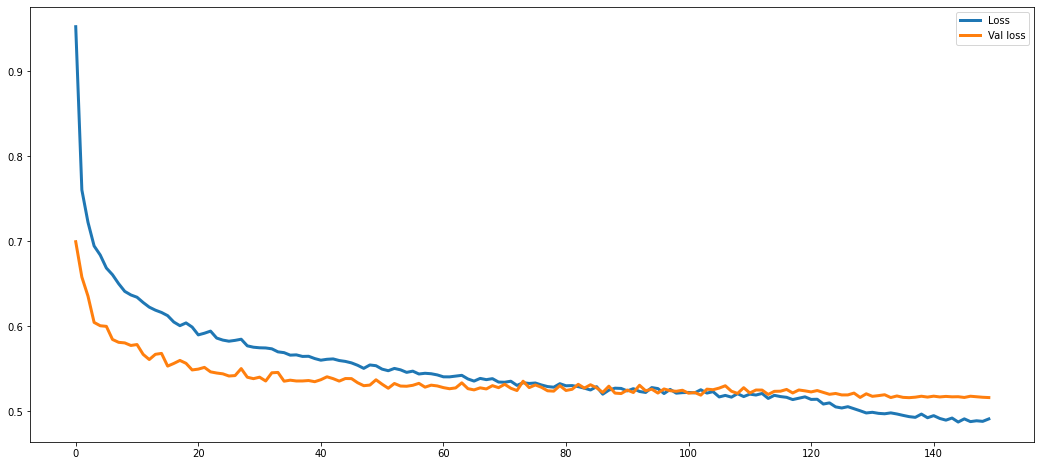

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(history.history['loss'], label='Loss', lw=3)
plt.plot(history.history['val_loss'], label='Val loss', lw=3)
plt.legend();

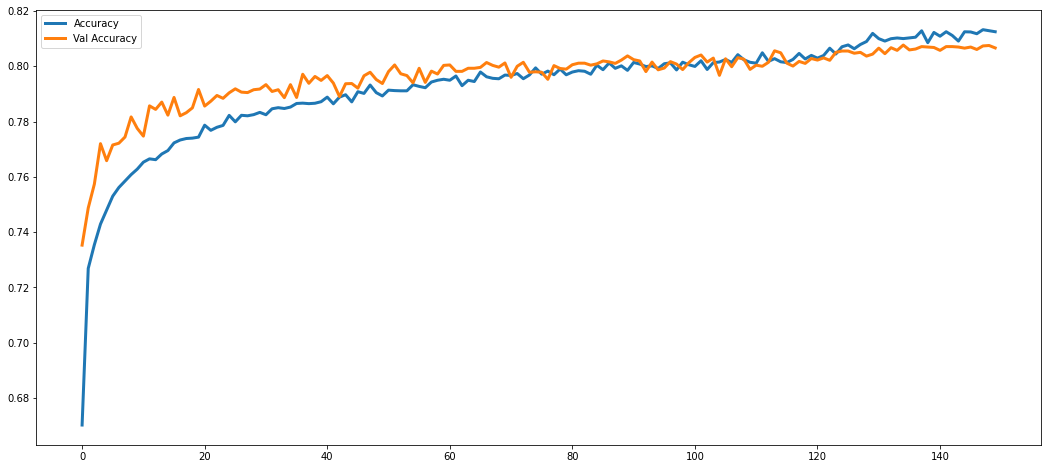

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(history.history['accuracy'], label='Accuracy', lw=3)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', lw=3)
plt.legend();

In [ ]:
print('The maximum validation accuracy observed in the last neural network model is ', round(max(history.history['val_accuracy']), 4))

The maximum validation accuracy observed in the last neural network model is  0.8077


# Principal Component Analysis

Principal Component Analysis (PCA) is a method that can be effective when dealing with data that has a high number of dimensionality. The idea is to attempt to decrease the dimensionality of the data while preserving the overall trend and pattern. Since our data is arbitrary (as far as I know) and has 108 features, PCA is definitely a method that should be considered in this scenario. So, let's apply it and see for ourselves.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

PCA()

In [ ]:
print(pca.explained_variance_ratio_.cumsum() * 100)

[  9.87066297  16.42342453  21.0691528   24.93595782  27.8558652
  30.65081446  33.32601111  35.76302938  38.03611196  40.24641766
  42.28720593  44.20402006  45.97062739  47.61142023  49.21001839
  50.70623145  52.13336995  53.51544509  54.8387915   56.12137539
  57.35816788  58.57055629  59.75681117  60.91829333  61.98807356
  63.01295956  64.0197288   64.9929826   65.95623069  66.88480737
  67.79504432  68.68599654  69.56376518  70.42332958  71.2721824
  72.09641602  72.90294837  73.70024206  74.48483399  75.26506815
  76.02674124  76.7794005   77.52119103  78.24825393  78.95993617
  79.65022752  80.33613059  80.99494941  81.64448562  82.28166917
  82.90906121  83.52187002  84.13016964  84.72582088  85.30609408
  85.87172623  86.4323615   86.97972603  87.51803414  88.05067314
  88.56764972  89.07519532  89.57542976  90.07185471  90.55732186
  91.02221612  91.47127499  91.9158704   92.34693683  92.76940226
  93.1887198   93.60072908  93.99239445  94.37927725  94.76239701
  95.1372109

The array above shows the cumulative sum of ratio of variance. In other words, shows the percentage of variance that is attributed by each features. The last 14 values observed in the array are 100, meaning that 14 of our features have no contribution to the classification task at hand! This means we can reduce the dimensionality of our data for further improvement of our model.

In [ ]:
pca = PCA(94)
pca.fit(X_scaled)

PCA(n_components=94)

Number of components: 94


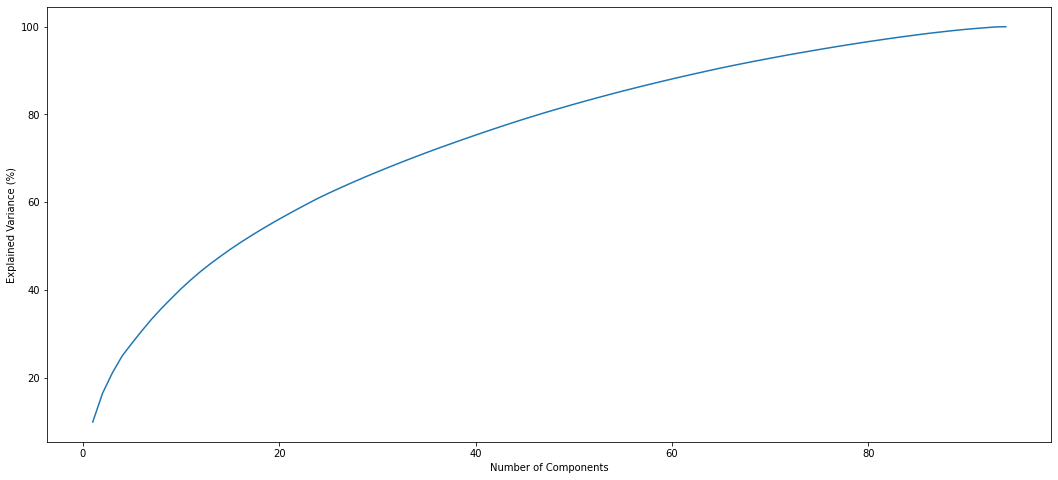

In [ ]:
components = len(pca.explained_variance_ratio_)

print(f'Number of components: {components}')

plt.figure(figsize=(18, 8))
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance (%)');

In [ ]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(62500, 94)
[[-2.00077999  0.0677347   0.27003274 ... -0.07149268 -0.02901744
   0.01816923]
 [ 2.38521631  2.55420717  2.04867277 ... -0.10443477  0.16628398
   0.04804103]
 [ 0.083884   -0.16249465  5.08448866 ...  0.01152175  0.27452385
   0.06586356]
 ...
 [ 2.88588554 -0.15433064  4.08878885 ...  0.10899562  0.20443202
   0.10650183]
 [ 7.86540604 -8.16808113  0.11541478 ...  0.20623299 -1.26846652
   0.54337375]
 [-2.62770153 -0.44535583  0.08522248 ...  0.04056526  0.00902871
  -0.01487079]]


In [ ]:
# Splitting data into test-validation using the PCA applied data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size = 0.8, random_state = 42)

In [ ]:
# Using the previous model
NNPCA = tf.keras.Sequential([
    tf.keras.layers.Dense(80, activation='relu', input_shape=[94]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [ ]:
NNPCA.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = NNPCA.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[lrscheduler]
)

Epoch 1/150
782/782 [==============================] - 8s 6ms/step - loss: 0.9730 - accuracy: 0.6637 - val_loss: 0.7064 - val_accuracy: 0.7327 - lr: 0.0100
Epoch 2/150
782/782 [==============================] - 4s 5ms/step - loss: 0.7710 - accuracy: 0.7226 - val_loss: 0.6585 - val_accuracy: 0.7475 - lr: 0.0100
Epoch 3/150
782/782 [==============================] - 4s 5ms/step - loss: 0.7269 - accuracy: 0.7346 - val_loss: 0.6474 - val_accuracy: 0.7548 - lr: 0.0100
Epoch 4/150
782/782 [==============================] - 7s 9ms/step - loss: 0.7017 - accuracy: 0.7404 - val_loss: 0.6164 - val_accuracy: 0.7675 - lr: 0.0100
Epoch 5/150
782/782 [==============================] - 4s 5ms/step - loss: 0.6919 - accuracy: 0.7446 - val_loss: 0.6173 - val_accuracy: 0.7606 - lr: 0.0100
Epoch 6/150
782/782 [==============================] - 4s 5ms/step - loss: 0.6786 - accuracy: 0.7491 - val_loss: 0.6080 - val_accuracy: 0.7644 - lr: 0.0100
Epoch 7/150
782/782 [==============================] - 6s 7ms/st

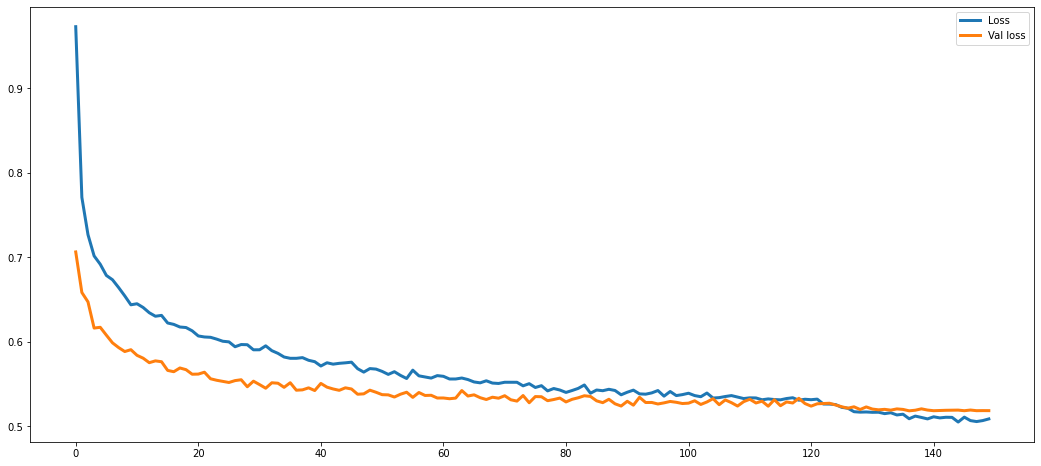

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(history.history['loss'], label='Loss', lw=3)
plt.plot(history.history['val_loss'], label='Val loss', lw=3)
plt.legend();

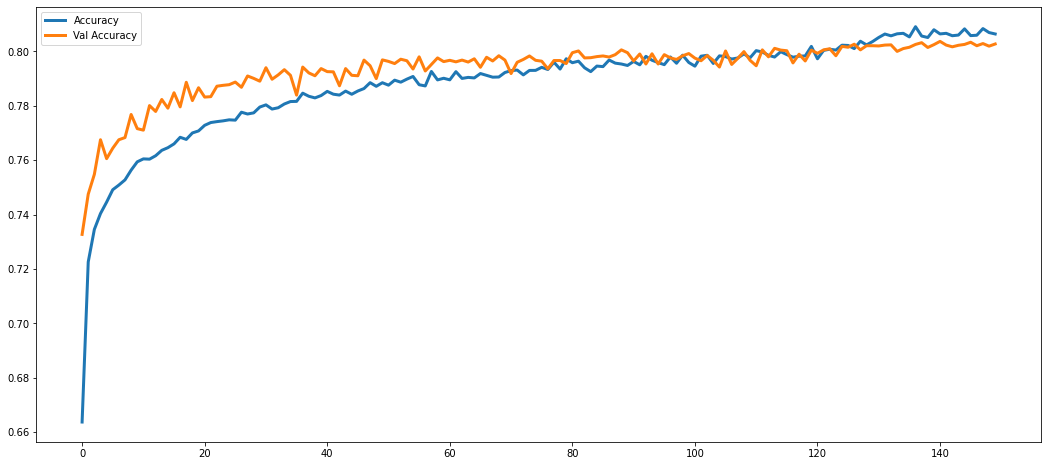

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(history.history['accuracy'], label='Accuracy', lw=3)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', lw=3)
plt.legend();

Despite decreasing the dimensionality down to 94 from 108, no significant change is observed.

# Random Forest

With neural networks, highest validation accuracy achieved was 80.77%. Let's use machine learning algorithms to see if they can do better.

In [ ]:
# Preparing data for 
df = pd.read_csv(path)
X = df.iloc[:, :108]
y = df.iloc[:, 108:]
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components = 94)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size = 0.8, random_state = 42)

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators = 200, random_state = 42).fit(X_train, y_train['y'])
RFC_predictions = RFC.predict(X_test)

RFC_cr = classification_report(y_test, RFC_predictions)
RFC_cm = confusion_matrix(y_test, RFC_predictions)

In [ ]:
print(RFC_cr)

              precision    recall  f1-score   support

           1       0.77      0.45      0.57       366
           2       0.66      0.89      0.76      3191
           3       0.58      0.41      0.48      1628
           4       0.89      0.17      0.28       584
           5       0.97      0.93      0.95       565
           6       0.93      0.94      0.93      2904
           7       0.77      0.58      0.66       585
           8       0.87      0.90      0.89      1682
           9       0.85      0.87      0.86       995

    accuracy                           0.78     12500
   macro avg       0.81      0.68      0.71     12500
weighted avg       0.79      0.78      0.76     12500



Out of 200 decision trees, the best one reached an accuracy of 78%

In [ ]:
print(RFC_cm)

[[ 166   16    7    0    0   33    8   60   76]
 [   3 2853  288    1   12   11   11    7    5]
 [   1  910  668    8    0    6   22   11    2]
 [   0  346  105   98    2   24    7    2    0]
 [   0   35    1    0  524    1    1    1    2]
 [   8   30    4    3    0 2726   31   56   46]
 [   6   69   62    0    3   51  342   49    3]
 [  12   29    8    0    0   67   23 1521   22]
 [  19   32    1    0    0   28    2   47  866]]


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train['y'])
SVM_predictions = SVM.predict(X_test)

SVM_cr = classification_report(y_test, SVM_predictions)
SVM_cm = confusion_matrix(y_test, SVM_predictions)

In [ ]:
print(SVM_cr)

              precision    recall  f1-score   support

           1       0.62      0.48      0.54       366
           2       0.64      0.91      0.75      3191
           3       0.59      0.31      0.41      1628
           4       0.85      0.28      0.43       584
           5       0.97      0.93      0.95       565
           6       0.94      0.93      0.94      2904
           7       0.73      0.59      0.66       585
           8       0.87      0.91      0.89      1682
           9       0.85      0.86      0.85       995

    accuracy                           0.78     12500
   macro avg       0.78      0.69      0.71     12500
weighted avg       0.78      0.78      0.76     12500



In [ ]:
print(SVM_cm)

[[ 175   23    1    0    0   28   11   50   78]
 [   6 2890  235   15   11    9   17    4    4]
 [   1 1073  505    7    0    3   32    5    2]
 [   0  329   61  166    2   16    8    2    0]
 [   0   36    1    0  524    0    0    3    1]
 [  21   27    1    5    0 2699   37   65   49]
 [  20   82   45    2    1   37  348   50    0]
 [  32   31    3    0    1   46   17 1532   20]
 [  29   27    1    0    0   30    5   51  852]]


# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train['y'])
KNN_predictions = KNN.predict(X_test)

KNN_cr = classification_report(y_test, KNN_predictions)
KNN_cm = confusion_matrix(y_test, KNN_predictions)

In [ ]:
print(KNN_cr)

              precision    recall  f1-score   support

           1       0.56      0.53      0.54       366
           2       0.66      0.86      0.74      3191
           3       0.54      0.43      0.48      1628
           4       0.69      0.23      0.34       584
           5       0.94      0.94      0.94       565
           6       0.94      0.92      0.93      2904
           7       0.71      0.55      0.62       585
           8       0.88      0.85      0.87      1682
           9       0.84      0.83      0.84       995

    accuracy                           0.76     12500
   macro avg       0.75      0.68      0.70     12500
weighted avg       0.76      0.76      0.75     12500



In [ ]:
print(KNN_cm)

[[ 193   15   10    1    3   19   16   40   69]
 [   5 2739  387   18   15    8    9    6    4]
 [   1  871  695   29    0    3   21    4    4]
 [   1  307  115  134    3   16    7    0    1]
 [   0   22    6    0  533    1    1    2    0]
 [  35   41    4    9    3 2675   40   53   44]
 [  22   90   66    1    6   28  324   47    1]
 [  51   47   12    1    2   73   35 1431   30]
 [  39   47    1    0    0   37    4   39  828]]


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB().fit(X_train, y_train['y'])
GNB_predictions = GNB.predict(X_test)

GNB_cr = classification_report(y_test, GNB_predictions)
GNB_cm = confusion_matrix(y_test, GNB_predictions)

In [ ]:
print(GNB_cr)

              precision    recall  f1-score   support

           1       0.23      0.18      0.20       366
           2       0.47      0.72      0.57      3191
           3       0.36      0.21      0.27      1628
           4       0.14      0.16      0.15       584
           5       0.45      0.94      0.60       565
           6       0.80      0.62      0.70      2904
           7       0.39      0.33      0.36       585
           8       0.59      0.36      0.45      1682
           9       0.65      0.50      0.56       995

    accuracy                           0.51     12500
   macro avg       0.45      0.45      0.43     12500
weighted avg       0.54      0.51      0.50     12500



In [ ]:
print(GNB_cm)

[[  66  153   12   15   30   32    1   22   35]
 [  36 2282  321  116  256   28   58   27   67]
 [  22  910  343   84   98   17  116   13   25]
 [   6  323   43   94   48   21   36    2   11]
 [   1   25    1    0  531    1    0    3    3]
 [  25  414   34  236   57 1798   33  238   69]
 [  15  149   73   35   35   26  195   53    4]
 [ 105  364   86   64   70  281   51  609   52]
 [  13  237   37   28   66   56    4   59  495]]


# Conclusion

Before concluding the report, I would like to machine other things I have tried and have not mentioned here:

- Adjusting the number of hidden layers and their units
- Using different optimizers
- Hyperparameter tuning (Both for neural network models and machine learning algorithms)
- GridSearchCV
- RandomizedSearchCV
- Cross Validation

These methods had no significant change in the performance of the models. Since the notebook is as long as it is, I have decided not to include them here on this notebook.

The model with the highest validation accuracy is the neural network named 'NN5'. Let's now use that model to predict the test_data.

It should also be mentioned that, from the confusion matrices, it is easy to conclude that the misclassification of classes 2, 3 and 4 cause the most loss in the overall accuracy of the models. I however was not able to find a way to tackle this problem. The next step I would take in this machine learning task would be to find an effective way to correctly classify classes 2, 3 and 4. With that, I think the accuracy of the model can be significantly increased.

In [ ]:
path = '/content/drive/MyDrive/task_2022/test_data_swc.csv'
df_predict = pd.read_csv(path)

In [ ]:
# Using the model to predict the y values of test data
prediction = NN5.predict(df_predict)
classes = np.array(prediction)

4688/4688 [==============================] - 13s 3ms/step


In [ ]:
# Store the predictions in a dataframe and rename the columns to fit to the ones in example.csv
df_predict = pd.DataFrame(classes)
i = 1
for column in df_predict.columns:
  df_predict.rename(columns={column: 'c' + str(i)}, inplace=True)
  i += 1
df_predict.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,0.001056,0.759768,0.175918,0.025307,0.000066,0.008028,0.027722,0.001783,0.000352
1,0.000130,0.000216,0.000100,0.000012,0.000007,0.001135,0.000029,0.998330,0.000041
2,0.001413,0.283152,0.371998,0.166183,0.000087,0.013243,0.161539,0.001569,0.000815
3,0.061748,0.023019,0.006327,0.007123,0.000434,0.643845,0.144194,0.090802,0.022507
4,0.000092,0.348165,0.320956,0.319631,0.000111,0.001783,0.008804,0.000316,0.000142


In [ ]:
# Convert the dataframe into a csv file
df_predict.to_csv('can_kucukyilmaz_final.csv', index=False)